In [60]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot 
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from wordcloud import WordCloud, STOPWORDS 
# from keras.datasets import imdb

### Data Fetching
1. Data has been fetched using colab notebook as locally it was taking a lot of time
2. Text was in .xml files
3. Text impressions has been extracted from .xml files and then put into a .csv file 
4. That .csv file has been downloaded
5. For text data we would be using that for EDA

## Exploring X-Ray Images

In [6]:
from PIL import Image
import glob
image_list = []
image_locations=[]
for filename in tqdm(glob.glob('E:\Medical data case study/*.png')): #assuming gif
    image_locations.append(filename)
    im=Image.open(filename)
    image_list.append(im)

100%|████████████████████████████████████████████████████████████████████████████| 7470/7470 [00:00<00:00, 8480.67it/s]


### Exploring a few X-ray Images

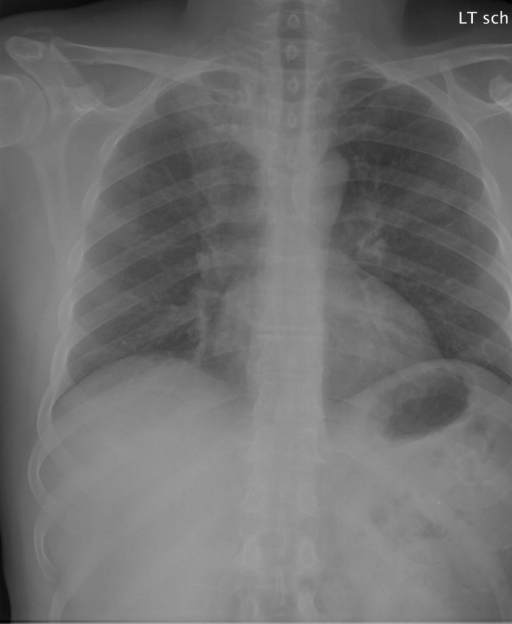

In [22]:
image_list[0]

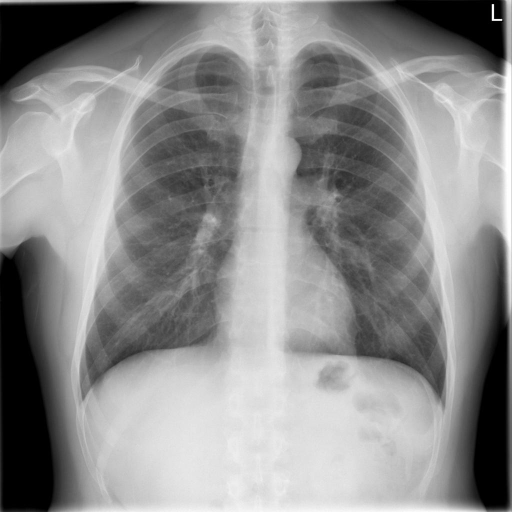

In [23]:
image_list[120]

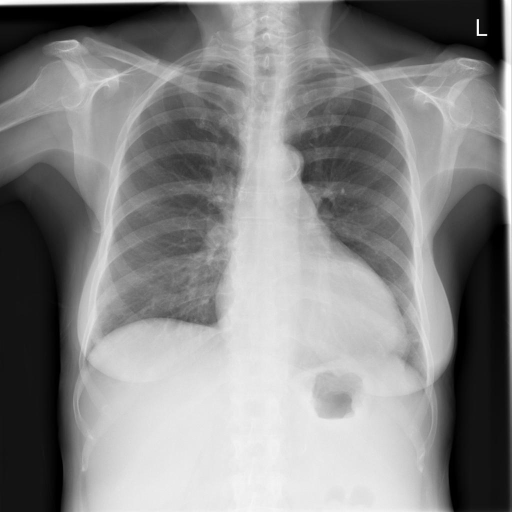

In [24]:
image_list[30]

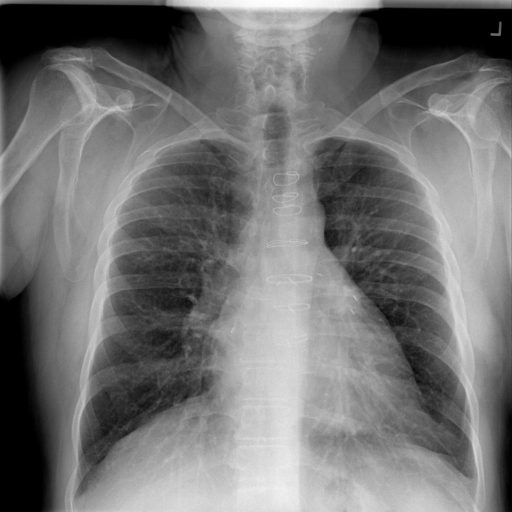

In [25]:
image_list[560]

### Checking Dimenesions of Image  

In [28]:
for i in range(0,10):
    height, width, channels = matplotlib.pyplot.imread(image_locations[i]).shape
    print("Height is {} Width is {} Channels is {} ".format(height, width, channels) )

Height is 624 Width is 512 Channels is 3 
Height is 624 Width is 512 Channels is 3 
Height is 624 Width is 512 Channels is 3 
Height is 485 Width is 512 Channels is 3 
Height is 545 Width is 512 Channels is 3 
Height is 420 Width is 512 Channels is 3 
Height is 624 Width is 512 Channels is 3 
Height is 624 Width is 512 Channels is 3 
Height is 512 Width is 512 Channels is 3 
Height is 512 Width is 512 Channels is 3 


### Conclusions about Images
1. Despite it being medical images, it has only 3 dimensions

In [30]:
df=pd.read_csv(r"C:\Users\Cyborg\Downloads\x_ray_image_with_report (1).csv")

In [31]:
df.head()

,Unnamed: 0,report_id,findings,impressions,image_names
0,0,585,"There are prominent epicardial fat pads, uncha...",No acute cardiopulmonary abnormality.,/content/drive/My Drive/Colab Notebooks/Medica...
1,1,586,The heart size is moderately enlarged. The pul...,Probable left midlung and left basilar atelect...,/content/drive/My Drive/Colab Notebooks/Medica...
2,2,587,The cardiomediastinal silhouette is within nor...,No interval change in the appearance of the ...,/content/drive/My Drive/Colab Notebooks/Medica...
3,3,582,Cardiomediastinal silhouette and pulmonary vas...,No acute cardiopulmonary findings.,/content/drive/My Drive/Colab Notebooks/Medica...
4,4,580,The heart is normal in size. The mediastinum i...,No acute disease.,/content/drive/My Drive/Colab Notebooks/Medica...


In [69]:
for i in range(1,20):
    print(df['impressions'][i])
    print('-'*50)

Probable left midlung and left basilar atelectasis. Cardiomegaly.
--------------------------------------------------
 No interval change in the appearance of the  opacities in the bilateral lower lobes.
--------------------------------------------------
No acute cardiopulmonary findings.
--------------------------------------------------
No acute disease.
--------------------------------------------------
No acute cardiopulmonary abnormality.
--------------------------------------------------
No acute or active cardiac, pulmonary or pleural disease.
--------------------------------------------------
Normal chest
--------------------------------------------------
No acute abnormalities are seen. .
--------------------------------------------------
No acute disease.
--------------------------------------------------
No acute cardiopulmonary disease.
--------------------------------------------------
 Borderline cardiomegaly.  Age-indeterminate,  chronic,  deformity in the midthoracic spi

### Observation:
Sentences are not so large

In [70]:
# Choose the top 5000 words from the vocabulary
top_k = 5000


In [71]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words=top_k,split=' ', char_level=False,filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
# fit the tokenizer on the documents
t.fit_on_texts(df['impressions'])

In [74]:

len(t.word_index)


1221

### Surprise
1. There are just 1221 words in Vocab and not even 5000 unlike most NLP tasks
2. So, let's check the wordcloud to get an idea about words
3. Lets take top 150 words

#### Note: See the snnipet below, it has no stopwords considered 

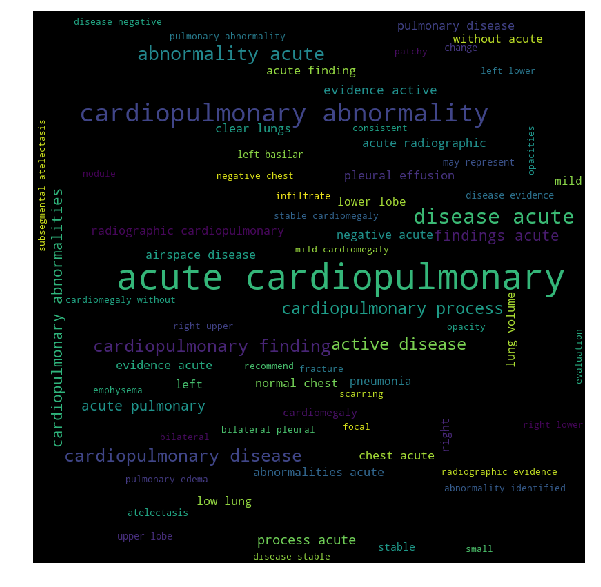

In [64]:
comment_words = '' 
# stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.impressions: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,  max_words=70,
                background_color ='black', 
                
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Conclusions
1. The number of words is very less compared to most popular NLP tasks
2. The reason maybe because of  mostly medical terms

## Final Conclusions
1. Dimension of Image to be considered (512, 624,3)
2. No need to use any embeddings. Bag of Words is fine.
